In [4]:
import pandas as pd
import seaborn as sns
import ast

In [5]:
customer_df = pd.read_csv("customer_profiles.csv")
ad_events_df = pd.read_csv("ad_events.csv")
ad_details_df = pd.read_csv("ad_details.csv")
customer_df.head()

,gender,age,id,became_member_on (year month day),income,ever_married,kids,home_state
0,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0,No,3,North Dakota
1,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0,Yes,0,Florida
2,M,68,e2127556f4f64592b11af22de27a7932,20180426,70000.0,Yes,3,Florida
3,M,65,389bc3fa690240e798340f5a15918d5c,20180209,53000.0,Yes,5,Missouri
4,M,58,2eeac8d8feae4a8cad5a6af0499a211d,20171111,51000.0,Yes,5,South Dakota


In [6]:
offer_id = []
for i in ad_events_df["event_info"]:
    if i[:13].find('offer id') != -1:
        id = i[14:]
        id = id[:-2]
        offer_id.append(id)
    else:
        offer_id.append(0)
ad_events_df["offer_id"] = offer_id

In [7]:
ad_events_df.head()

,customer,event,event_info,time,offer_id
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0,9b98b8c7a33c4b65b9aebfe6a799e6d9
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0,0b1e1539f2cc45b7b9fa7c272da2e1d7
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0,2906b810c7d4411798c6938adc9daaa5
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0,fafdcd668e3743c1bb461111dcafc2a4
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0,4d5c57ea9a6940dd891ad53e9dbe8da0


In [8]:
ad_details_df.head()

,reward,channels,required_amount,duration (days),offer_type,ad id
0,10,"['email', 'mobile', 'social']",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,10,"['web', 'email', 'mobile', 'social']",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,0,"['web', 'email', 'mobile']",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,5,"['web', 'email', 'mobile']",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,5,"['web', 'email']",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7


In [9]:
#finding the people that use bogo the most
bogo_offers = []
bogo_people = []
for i in range(len(ad_details_df)):
    if ad_details_df["offer_type"][i] == "bogo":
        bogo_offers.append(ad_details_df["ad id"][i])

for i in range(len(ad_events_df)):
    if ad_events_df["event"][i] == "offer received":
        if ad_events_df["offer_id"][i] in bogo_offers:
            bogo_people.append(ad_events_df["customer"][i])

bogo_people_df = customer_df[customer_df['id'].isin(bogo_people)].copy()
bogo_people_df.head()

,gender,age,id,became_member_on (year month day),income,ever_married,kids,home_state
0,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0,No,3,North Dakota
1,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0,Yes,0,Florida
2,M,68,e2127556f4f64592b11af22de27a7932,20180426,70000.0,Yes,3,Florida
3,M,65,389bc3fa690240e798340f5a15918d5c,20180209,53000.0,Yes,5,Missouri
5,F,61,aa4862eba776480b8bb9c68455b8c2e1,20170911,57000.0,No,1,Mississippi


<Axes: xlabel='age', ylabel='income'>

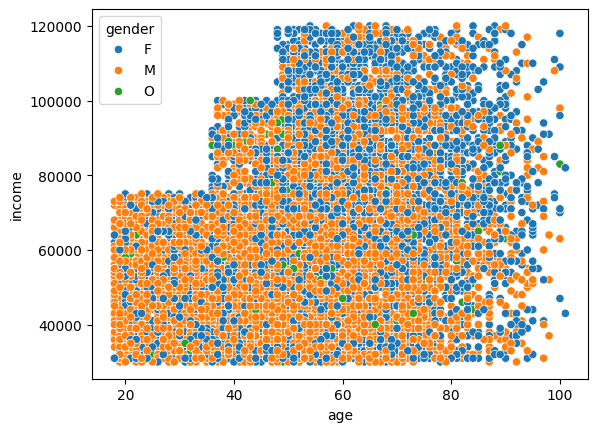

In [13]:
sns.scatterplot(data=bogo_people_df, x="age", y="income", hue="gender")

In [ ]:
women_bogo_people = bogo_people_df[bogo_people_df['gender'] == 'F'].copy()
men_bogo_people = bogo_people_df[bogo_people_df['gender'] == 'M'].copy()

<Axes: xlabel='age', ylabel='kids'>

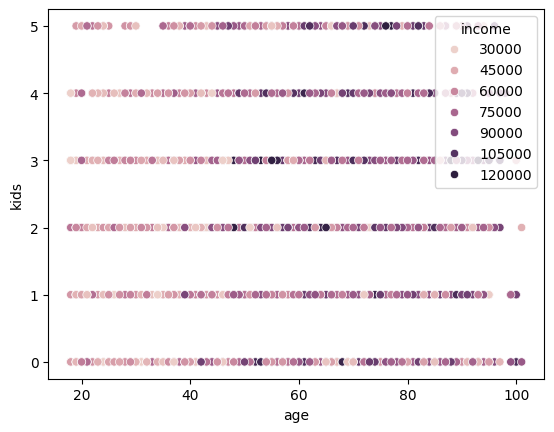